<a href="https://colab.research.google.com/github/SantiagoM1227/IIT-2022-I/blob/main/LL_avance_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Inicialización



In [ ]:
#init
from matplotlib import pyplot as pl 
import numpy as np
from numpy.linalg import eig
import math as math

#tweaks
a=1
pi = np.pi
I = 0+1j
N = 50 #Matrix truncation
G = 30 #should be less than N
C = 2*G
D = -I*G/pi
epsilon = 10**(-3)

In [ ]:
#plots
def plotenergies(E,x_lim,y_lim):
  E = np.real(E)
  l = len(E)
  Energy = np.sort(E)
  x=np.linspace(1,l,l)
  pl.xlabel("Eigenvalue Number") 
  pl.ylabel("Energies") 
  pl.xlim([0, x_lim])
  pl.ylim([0, y_lim])
  pl.scatter(x,Energy) 
  pl.show()
def plotdensities(Matrix,N,steps,level):
    x = np.linspace(0,1,steps+1) #a =1
    Psi = eigenstates(Matrix,N,steps,level)
    pl.figure(figsize=(8,8))
    fig = pl.contour(x,x,np.square(np.abs(Psi)),500)
    ax = pl.axes()
    ax.set_facecolor("black")
    pl.tight_layout()
def plotdensities_Mobius(Matrix,N,steps,level):
    x = np.linspace(0,1,steps+1) #a =1
    Psi_Mobius = eigenstates_Mobius(Matrix,N,steps,level)
    pl.figure(figsize=(8,8))
    fig = pl.contour(x,x,np.square(np.abs(Psi_Mobius)),500)
    ax = pl.axes()
    ax.set_facecolor("black")
    pl.tight_layout()
def plotdensities_Cylinder(Matrix,N,steps,level):
    x = np.linspace(0,1,steps+1) #a =1
    Psi_Cylinder = eigenstates_Cylinder(Matrix,N,steps,level)
    pl.figure(figsize=(8,8))
    fig = pl.contour(x,x,np.square(np.abs(Psi_Cylinder)),500)
    ax = pl.axes()
    ax.set_facecolor("black")
    pl.tight_layout()


## Cuadrado

In [ ]:
#square

#Auxiliary functions
def g_o(n,nn):
  if (n+nn)%2==0:
    value = 0
  else: 
    term1 = 1/(n-nn)**2
    term2 = 1/(n+nn)**2
    value = term1-term2
  return value

def g_e(n,nn):
  if (n+nn)%2==0:
    term1 = 1/(n-nn)**2
    term2 = 1/(n+nn)**2
    value = term1-term2
  else: 
    value = 0
  return value

def f_o(n,nn):
  if (n+nn)%2==0:
    value = 0
  else: 
    num = n*nn
    den = n**2-nn**2
    value = num/den
  return value

In [ ]:
#4D hamiltonian matrix elements
def H_n_nn_m_mm(n,nn,m,mm):
    if mm==m:
        if nn==n:
            element = (n**2)+(m**2)+((G**2)/2)*((1/3)-((1/(pi*n))**2)-((1/(pi*m)**2)))
        else: 
            element = 2*(G/pi)**2*(g_e(n,nn))
    else: 
        if n==nn:
            element = 2*(G/pi)**2*(g_e(m,mm))
        else:
            element = -I*(16*G/(pi**3))*(g_o(n,nn)*f_o(m,mm)-g_o(m,mm)*f_o(n,nn))
    return element

H_n_nn_m_mm(1,1,1,1)

60.810934721896

In [ ]:
#4D NxNxNxN matrix to 2D NxN matrix of 2D NxN matrices  N is the precission
def H_m_mm_Matrix(m,mm,N):
  H_block = np.zeros((N,N),dtype=complex)
  if m==mm:
    for n in range(N):
      H_block[n][n] = H_n_nn_m_mm(n+1,n+1,m+1,mm+1)
      for nn in range (N):
        H_block[n][nn] = H_n_nn_m_mm(n+1,nn+1,m+1,mm+1)
  else: 
    for n in range(N):
      for nn in range(N):
        H_block[n][nn] = H_n_nn_m_mm(n+1,nn+1,m+1,mm+1)
  return H_block

In [ ]:
#Break blocks
def H_matrix(N):
    Zero = np.zeros((N,N),dtype = complex)
    H = [[Zero for _ in range(N)] for _ in range(N)] #NxN "matrix of matrices" of NxN zero matrices
    #fill upper triangular blocks and leave zeros everywhere
    for m in range(N):
      H[m][m] = H_m_mm_Matrix(m,m,N) #diagonal 
      for mm in range(m+1,N):
        H[m][mm] = H_m_mm_Matrix(m,mm,N) #upper triangle
    H = np.matrix(np.block(H)) #from block to matrix
    H_final = np.triu(H)+ np.tril(np.conj(H.T),-1) #Make Hermitian
    #quality control
    print(H_final)
    print(np.size(H_final,1))
    return H_final

In [ ]:
def eigenstates(Matrix,N,steps,level):
    Psi = np.zeros([steps+1,steps+1], dtype = complex )
    x = np.linspace(0,1,steps)
    y = x
    Matrix = np.reshape(Matrix[:,level],[N,N])
    for j in range(len(x)):
        for k in range(len(y)):
            Psi_y = np.array([np.sqrt(2)*np.sin((t+1)*pi*y[k]) for t in range (N)])
            Psi_x = np.array([np.sqrt(2)*np.sin((t+1)*pi*x[j]) for t in range (N)])
            A = np.matmul(Matrix,Psi_y)
            B = np.matmul(np.transpose(Psi_x),A)
            #print(B,np.size(B)) control
            Psi[k,j] = B
    out = Psi
    return out


In [ ]:
#calculate
H = H_matrix(N)

[[  60.81093472+0.00000000e+00j    0.        +0.00000000e+00j
    34.19589948+0.00000000e+00j ...    0.        +8.79424449e-07j
     0.        +0.00000000e+00j    0.        +0.00000000e+00j]
 [   0.        +0.00000000e+00j   98.0068342 +0.00000000e+00j
     0.        +0.00000000e+00j ...    0.        +0.00000000e+00j
     0.        +8.62540075e-07j    0.        +0.00000000e+00j]
 [  34.19589948+0.00000000e+00j    0.        +0.00000000e+00j
   109.33940818+0.00000000e+00j ...    0.        +2.76513527e-06j
     0.        +0.00000000e+00j    0.        +9.58788671e-08j]
 ...
 [   0.        -8.79424449e-07j    0.        +0.00000000e+00j
     0.        -2.76513527e-06j ... 4953.96197289+0.00000000e+00j
     0.        +0.00000000e+00j   45.57554283+0.00000000e+00j]
 [   0.        +0.00000000e+00j    0.        -8.62540075e-07j
     0.        +0.00000000e+00j ...    0.        +0.00000000e+00j
  5050.96277238+0.00000000e+00j    0.        +0.00000000e+00j]
 [   0.        +0.00000000e+00j    0.   

In [ ]:
#solve matrix
E, V = eig(H)

In [ ]:
index = np.argsort(np.real(E))
print(index)

[254 435 436 ...   1   0   2]


In [ ]:
C = V[:,index]

In [ ]:
A = (C[:,1])
print(C[:,1],np.size(2))

[-1.41818563e-06-1.83940199e-08j -3.63776424e-01-1.82936717e-09j
  4.67695628e-07-2.80244609e-07j ...  2.56311227e-16-4.14963106e-16j
  2.49897658e-17-4.47649818e-11j  1.78471051e-16-2.58157671e-16j] 1


In [ ]:
D = np.sort(E)

In [ ]:
print(D[470])

(631.9264043334526+5.375259817632014e-14j)


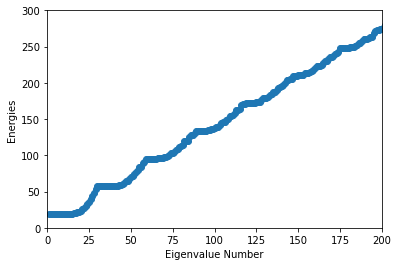

In [ ]:
#print & plot
plotenergies(D,200,300)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


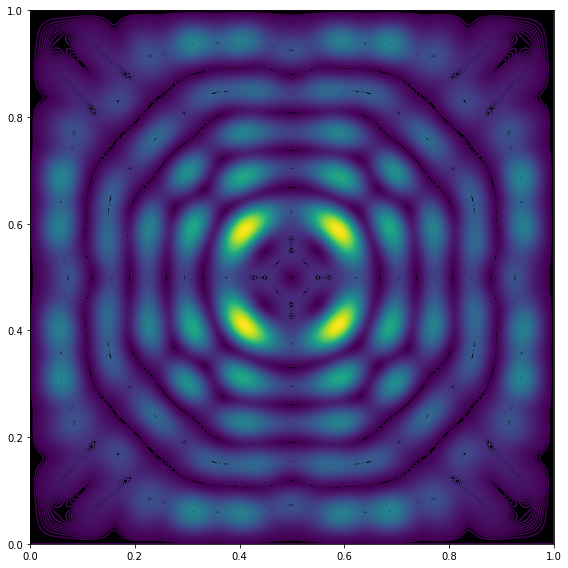

In [ ]:
plotdensities(C,N,500,130)

## Cinta de Möbius

In [ ]:
#auxiliary functions
def oscMOB(m,mm):
  if m==mm:
    out = 1/3
  else: 
    num = 2-I*(m-mm)*pi
    den = ((m-mm)**2)*(pi**2)
    out = num/den
  return out
def angMOB(m, mm,n,nn):
  if (nn+n)%2==0:
    out = 0
  else: 
    if m == mm:
      num = -2*(n*nn)
      den = (n**2-nn**2)
      out = num/den
    else: 
      num = 4*(n*nn)*(2+I*pi*(mm-m))
      den = (n**2-nn**2)*((m-mm)**2)*pi**2
      out = num/den
  return out
  

In [ ]:
#Möbius Hamiltonian matrix elements
def Mobius_H(k,l): #k,l indices of N*N X N*N matrix
    m=k//N -(N//2) # also negative indices
    n=(2*(k%N))+((m+1)%2)  #|m,n>
    if n%2==0:
      n = n+2
    mm=l//N -(N//2) 
    nn=(2*(l%N))+((mm+1)%2) #<mm,nn|
    if nn%2==0:
      nn = nn+2
    if n==nn:
      element = 4*G**2*oscMOB(m,mm)
      if m==mm:
        element = element + m**2+n**2
    else:
      element = I*(4*G/np.pi)*angMOB(m,mm,n,nn)
    return element
def trapMOB(k,l):
    m=k//N -(N//2) # also negative indices
    n=(2*(k%N))+((m+1)%2)  #|m,n>
    if n%2==0:
      n = n+2
    mm=l//N -(N//2) 
    nn=(2*(l%N))+((mm+1)%2) #<mm,nn|
    if nn%2==0:
      nn = nn+2
    C = (pi*epsilon/2)**2
    if n==nn:
      if m==mm:
        out = (1/6)*(1-(3/(n*pi)**2))
      else:
        out = 2/((pi*(m-mm))**2)
    else: 
      if m==mm:
        out = 8*n*nn/(((n**2-nn**2)**2)*pi**2)
      else:
        out = 0
    return C*out

In [ ]:
def H_Mobius_Matrix(N):
  H_Mobius = np.zeros((N*N,N*N),dtype=complex)
  for k in range(N*N):
    for l in range(0,k+1):
      H_Mobius[k,l]= Mobius_H(k,l)+trapMOB(k,l)
  for k in range(N*N):
    for l in range(k+1,N*N):
      H_Mobius[k,l]= np.conj(H_Mobius[l,k])
  return H_Mobius

In [ ]:
#Break blocks for Möbius Matrix
#def H_Mmm(N):
#    Zero = np.zeros((N,N),dtype = complex)
#    H_Mobius = [[Zero for _ in range(N)] for _ in range(N)] #NxN "matrix of matrices" of NxN zero matrices
#    #fill upper triangular blocks and leave zeros everywhere
#    for m in range(N):
#      H_Mobius[m][m] = H_m_mm_Mobius_Matrix(m,m,N) #diagonal 
#      for mm in range(m+1,N):
#        H_Mobius[m][mm] = H_m_mm_Mobius_Matrix(m,mm,N) #upper triangle
#    H_Mobius = np.matrix(np.block(H_Mobius)) #from block to matrix
#    H_final = np.triu(H_Mobius)+ np.tril(np.conj(H_Mobius.T),-1) #Make Hermitian
#    #quality control
#    print(H_final)
#    print(np.size(H_final,1))
#    return H_final

In [ ]:
H_Mobius = H_Mobius_Matrix(N)

In [ ]:
print(H_Mobius,H_Mobius[1550,420])

[[1.82915400e+03+0.j         4.50316372e-02-0.j
  9.49886097e-03-0.j         ... 2.09047188e-02-0.0002716j
  2.04733232e-02-0.00026599j 2.00593795e-02-0.00026062j]
 [4.50316372e-02+0.j         1.84116350e+03+0.j
  4.86341681e-02-0.j         ... 4.18651278e-02-0.00054392j
  4.09989576e-02-0.00053267j 4.01679593e-02-0.00052187j]
 [9.49886097e-03+0.j         4.86341681e-02+0.j
  1.86116526e+03+0.j         ... 6.29374129e-02-0.0008177j
  6.16296611e-02-0.00080071j 6.03753428e-02-0.00078441j]
 ...
 [2.09047188e-02+0.0002716j  4.18651278e-02+0.00054392j
  6.29374129e-02+0.0008177j  ... 1.08011667e+04+0.j
  5.06550948e-02-0.j         1.26597637e-02-0.j        ]
 [2.04733232e-02+0.00026599j 4.09989576e-02+0.00053267j
  6.16296611e-02+0.00080071j ... 5.06550948e-02+0.j
  1.11851667e+04+0.j         5.06553169e-02-0.j        ]
 [2.00593795e-02+0.00026062j 4.01679593e-02+0.00052187j
  6.03753428e-02+0.00078441j ... 1.26597637e-02+0.j
  5.06553169e-02+0.j         1.15771667e+04+0.j        ]] (-0.05

In [ ]:
#Verify Hermiticity
H_Mobius-np.conj(H_Mobius.T)

array([[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       ...,
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]])

In [ ]:
#solve matrix 
E_Mobius, V_Mobius = eig(H_Mobius)

In [ ]:
print(E_Mobius) 

[24228.44650776-2.59821048e-12j 23597.91715069+8.37156763e-13j
 23612.22181488+1.52772114e-12j ...   556.93289106-1.97557956e-13j
   595.58635502-1.79199380e-13j   670.20423744-4.77470107e-14j]


In [ ]:
EE = np.sort(np.real(E_Mobius))
print(EE)

[1.91092006e+01 1.91198082e+01 1.91304177e+01 ... 2.35979172e+04
 2.36122218e+04 2.42284465e+04]


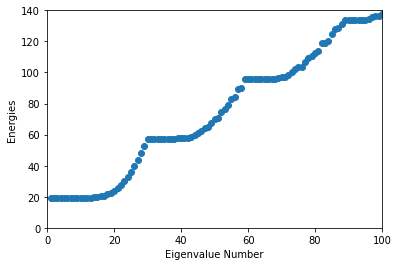

In [ ]:
#print & plot
plotenergies(EE,100,140) 

In [1]:
def oddonly(Matrix):
    N = np.size(Matrix,1)
    MMatrix = np.zeros([N,2*N], dtype = complex)
    if (N//2)%2==1:
      for i in range(N):
        for j in range(N):
          if i%2==0:
            MMatrix[i,2*j+1] = Matrix[i,j]
          else:
            MMatrix[i,2*j] = Matrix[i,j]
    else: 
      for i in range(N):
        for j in range(N):
          if i%2==0:
            MMatrix[i,2*j] = Matrix[i,j]
          else:
            MMatrix[i,2*j+1] = Matrix[i,j]                              
    return MMatrix

In [ ]:
#test 
R = np.random.randint(10, size = (3,3) )
R[R==0] = 1
print(R)
OV = oddonly(R)
print(OV)

[[7 1 5]
 [9 1 1]
 [9 4 9]]
[[0.+0.j 7.+0.j 0.+0.j 1.+0.j 0.+0.j 5.+0.j]
 [9.+0.j 0.+0.j 1.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 9.+0.j 0.+0.j 4.+0.j 0.+0.j 9.+0.j]]


In [ ]:
def eigenstates_Mobius(Matrix,N,steps,level):
    Psi = np.zeros([steps+1,steps+1], dtype = complex)
    x = np.linspace(0,1,steps)
    y = x
    Matrix = np.reshape(Matrix[:,level],[N,N])
    MMatrix = oddonly(Matrix) # only linear combinations of odd-summing indices
    for j in range(len(x)):
        for k in range(len(y)):
            Psi_y = [np.sqrt(2)*np.sin((t+1)*pi*y[k]) for t in range(2*N)]
            Psi_x = [np.exp(I*(t-N//2)*pi*x[j]) for t in range(N)] #account for negative states
            A = np.matmul(MMatrix,Psi_y)
            B = np.matmul(np.transpose(Psi_x),A)
            #print(B,np.size(B)) control
            Psi[k,j] = B
    out = Psi
    return out

In [ ]:
index = np.argsort(EE)
print(index)

[   0    1    2 ... 2497 2498 2499]


In [ ]:
C_Mobius = V_Mobius[:,index]

In [ ]:
print(C_Mobius[:,3],np.size(C_Mobius[:,2]))

[-2.88982502e-07-8.62808870e-08j -5.78966284e-07-1.72850618e-07j
 -8.70966600e-07-2.60001934e-07j ... -2.40940899e-02-2.64144476e-02j
 -8.68714661e-03-1.05718035e-02j -6.80946539e-03-8.00308399e-03j] 2500


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


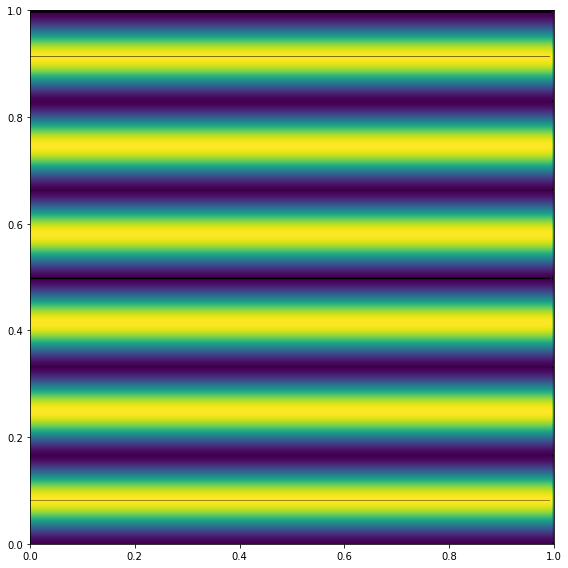

In [ ]:
plotdensities_Mobius(np.eye(N*N),N,200,2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


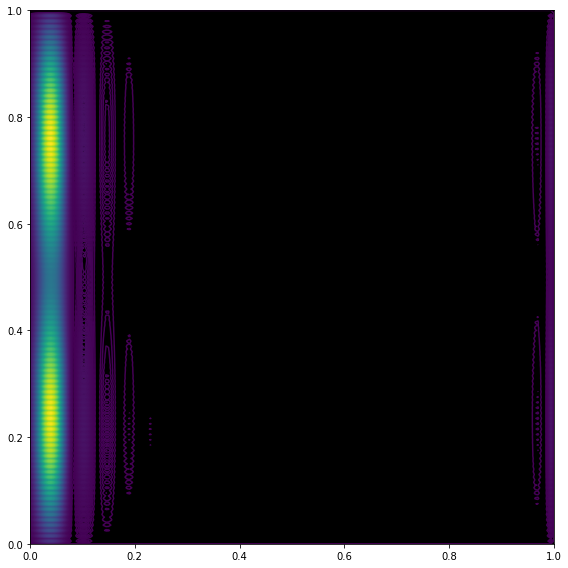

In [ ]:
plotdensities_Mobius(C_Mobius,N,200,2)

## Cilindro



In [ ]:
N = 50
G = 30

In [ ]:
def oscCYL(m,mm):
  if m==mm:
    out =  1/3
  else:
    num = (2-I*(m-mm)*pi)
    den = (pi**2)*((m-mm)**2)
    out = (num/den)
  return out

def angCYL(m,mm,n,nn): 
  if (n+nn)%2==1:
    if m==m:
      num = -2*n*nn
      den = (n**2-nn**2)
      out = num/den
    else: 
      num = 4*I*n*nn
      den = (n**2-nn**2)*(m-mm)*pi
      out = num/den
  else: 
    out = 0
  return out

In [ ]:
def fc(n,nn,m,mm):
  i=0+1j
  if (n+nn)%2==0:
    return 0
  else:
    if m==mm:
      return i*n*nn/(n**2-nn**2)
    else:
      return n*nn/((np.pi)*(nn**2-n**2)*(mm-m))

def gc(m,mm):
  i=0+1j
  if m==mm:
    return 1/3
  else:
    return (1+i*np.pi*(mm-m))/(2*(np.pi**2)*(mm-m)**2)


In [ ]:
import random
Rx= random.sample(range(-50, 50), 2)
Rx[Rx==0]=1
Ry= random.sample(range(1, 50), 2)
Ry[Rx==0]=1
print([2*i for i in Rx],Ry)
print((-8*G/np.pi)*fc(Ry[0],Ry[1],Rx[0],Rx[1])- I*(4*G/np.pi)*angCYL(2*Rx[0],2*Rx[1],Ry[0],Ry[1]))

[2, 98] [1, 4]
(-0.13509491152311706-20.371832715762604j)


In [ ]:
 #4D  Möbius Hamiltonian matrix elements
def Cylinder_H(k,l):
  m=2*(k//N -N//2)
  n=k%N
  mm=2*(l//N -N//2)
  nn=l%N 
  if n==nn:
    element = 4*(G**2)*oscCYL(m,mm)
    if m==mm:
      element = element + m**2+n**2
  else:
    element = I*(4*G/np.pi)*angCYL(m,mm,n,nn)
  return element

    

In [ ]:
#2D NxN matrix of 2D NxN matrices  N is the precission
def H_Cylinder_Matrix(N):
  H_Cylinder = np.zeros((N*N,N*N),dtype=complex)
  for k in range(N*N):
    for l in range(0,k+1):
      H_Cylinder[k,l]= Cylinder_H(k,l)
  for k in range(N*N):
    for l in range(k+1,N*N):
      H_Cylinder[k,l]= np.conj(H_Cylinder[l,k])
  return H_Cylinder

In [ ]:
#def H_Cylinder_matrix(N):
#    Zero = np.zeros((N,N),dtype = complex)
#    H = [[Zero for _ in range(N)] for _ in range(N)] 
#    #NxN "matrix of matrices" of NxN zero matrices
#    #fill upper triangular blocks and leave zeros everywhere
#    for m in range(N):
#      H[m][m] = H_m_mm_Cylinder_Matrix(m,m,N) 
#      #diagonal 
#      for mm in range(m+1,N):
#        H[m][mm] = H_m_mm_Cylinder_Matrix(m,mm,N) 
#        #upper triangle
#    H = np.matrix(np.block(H)) 
#    #from block to matrix
#    H_final = np.triu(H)+ np.tril(np.conj(H.T),-1) 
#    #Make Hermitian
#    #quality control
#    print(H_final)
#    print(np.size(H_final,1))
#    return H_final

In [ ]:
H_Cylinder = H_Cylinder_Matrix(N)

In [ ]:
print(H_Cylinder)

[[3700.+0.00000000e+00j    0.-0.00000000e+00j    0.-0.00000000e+00j ...
     0.-0.00000000e+00j    0.-0.00000000e+00j    0.-0.00000000e+00j]
 [   0.+0.00000000e+00j 3701.+0.00000000e+00j   -0.+5.09295818e+01j ...
     0.-0.00000000e+00j   -0.+1.59224051e+00j    0.-0.00000000e+00j]
 [   0.+0.00000000e+00j   -0.-5.09295818e+01j 3704.+0.00000000e+00j ...
    -0.+3.25672156e+00j    0.-0.00000000e+00j   -0.+3.12334106e+00j]
 ...
 [   0.+0.00000000e+00j    0.+0.00000000e+00j   -0.-3.25672156e+00j ...
  5713.+0.00000000e+00j   -0.+1.81416531e+03j    0.-0.00000000e+00j]
 [   0.+0.00000000e+00j   -0.-1.59224051e+00j    0.+0.00000000e+00j ...
    -0.-1.81416531e+03j 5808.+0.00000000e+00j   -0.+1.85236664e+03j]
 [   0.+0.00000000e+00j    0.+0.00000000e+00j   -0.-3.12334106e+00j ...
     0.+0.00000000e+00j   -0.-1.85236664e+03j 5905.+0.00000000e+00j]]


In [ ]:
H_Cylinder-np.conj(H_Cylinder.T)

array([[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       ...,
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]])

In [ ]:
#solve matrix
E_Cylinder, V_Cylinder = eig(H_Cylinder)
print(E_Cylinder)

[ 384220.96842379+1.17653586e-10j -365623.63840683-1.34041148e-10j
  372463.72842588-9.27853811e-11j ...    4830.23358004+1.23780174e-13j
    4830.14292995-8.15601414e-13j    4830.09940494-2.09068405e-14j]


In [ ]:
EE_Cylinder = np.real(E_Cylinder)
print(EE_Cylinder)
D_Cylinder = np.sort(EE_Cylinder)
print(D_Cylinder)

[ 145512.06451347 -136686.37396167  139243.47069392 ...    2584.003613
    2577.24465251    2577.31460152]
[-136686.37396167 -130776.22339641 -125012.53363655 ...  133142.52584975
  139243.47069392  145512.06451347]


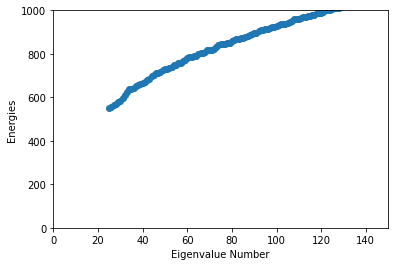

In [ ]:
#print & plot
plotenergies(D_Cylinder,150,1000) 

In [ ]:
def eigenstates_Cylinder(Matrix,N,steps,level):
    Psi = np.zeros([steps+1,steps+1], dtype = complex )
    x = np.linspace(0,1,steps)
    y = x
    Matrix = np.reshape(Matrix[:,level],[N,N])
    for j in range(len(x)):
        for k in range(len(y)):
            Psi_y = [np.sqrt(2)*np.sin((t+1)*pi*y[k]) for t in range(N)]
            Psi_x = [np.cos(2*(t+1)*pi*y[k])+np.sin(2*(t+1)*pi*y[k])*I for t in range(N)]
            A = np.matmul(Matrix,Psi_y)
            B = np.matmul(np.transpose(Psi_x),A)
            #print(B,np.size(B)) control
            Psi[k,j] = B
    out = Psi
    return out

In [ ]:
index_Cylinder = np.argsort(np.real(E_Cylinder))
print(index_Cylinder)

[203 204 205 ...   2   1   0]


In [ ]:
C_Cylinder = V_Cylinder[:,index]

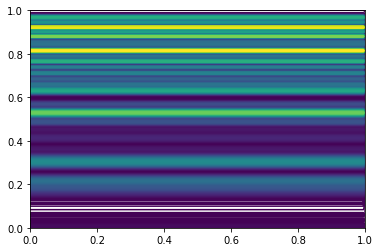

In [ ]:
plotdensities_Cylinder(C_Cylinder,N,200,0)